In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [40]:
X, y = make_blobs(100, centers=2, random_state=0)

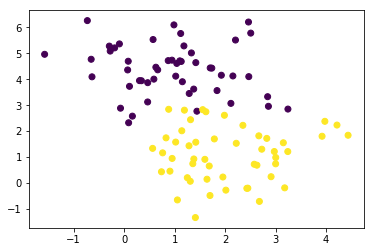

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [108]:
class CustomLogisticRegression:
    
    def __init__(self, lr=.5, iters=100):
        self.lr = lr
        self.iters = iters
        
    def fit(self, X, y):
        self.X = np.hstack([np.ones([X.shape[0], 1]), X])
        self.y = y.reshape(-1, 1)
        
        self.theta = np.zeros((self.X.shape[1], 1))
        
        for i in range(self.iters):
            self.gradient_dec()
            
        
    def gradient_dec(self):
        d_theta = self.gradient()
        self.theta += d_theta
    
    def gradient(self):
        yh = CustomLogisticRegression.hypothesis(self.X, self.theta)
        d_theta = np.mean((self.y - yh) * self.X, axis=0)
#         print(d_theta)
        return d_theta.reshape(-1, 1)

    def predict(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        yh = CustomLogisticRegression.hypothesis(X, self.theta)
        return (yh > .5).astype(int).flatten()
    
    def score(self, X, y):
        yh = self.predict(X)
        return np.sum(yh == y)/len(y)
        
    @classmethod
    def hypothesis(cls, X, theta):
        z = np.dot(X, theta)
        return 1 / (1 + np.exp(-z))
    

In [109]:
model = CustomLogisticRegression(iters=1000)
model.fit(X,y)

In [110]:
theta = model.theta

In [111]:
inter = -theta[0]/theta[2]
slop = -theta[1]/theta[2]

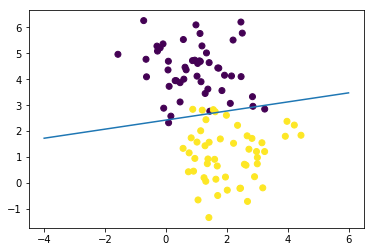

In [112]:
x_range = np.linspace(-4, 6, 2)
y_values = x_range * slop + inter
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x_range, y_values)

In [113]:
model.predict(X[:10])

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [114]:
y[:10]

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [115]:
model.score(X[:10], y[:10])

0.9

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [118]:
X = pd.read_csv("../datasets/chemical/Logistic_X_Train.csv").values
y = pd.read_csv("../datasets/chemical/Logistic_Y_Train.csv").values

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [122]:
model = CustomLogisticRegression(iters=10000)

In [123]:
model.fit(X_train, y_train)

In [124]:
model.score(X_test, y_test)

496.1111111111111

In [126]:
model.predict(X_test[:10])

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1])

In [127]:
model.score(X_test, y_test.flatten())

0.9949494949494949

In [128]:
X_custom = pd.read_csv("../datasets/chemical/Logistic_X_Train.csv").values

In [130]:
y_custom = model.predict(X_custom)

In [131]:
df = pd.DataFrame.from_dict({"Outcome":y_custom})

In [135]:
df.to_csv("outcome.csv", index=False)